In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.pad'] = 1

mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis


	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.375

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


### About
This notebook plots the dependence of STARLING prediction times on sequence length.

### Data generation
Data for these figures is generated using the `benchmark_length_dependence.py` script. This can be run as

    python benchmark_length_dependence.py --device <device device to test>

And will automatically generate a file called `time_vs_seqlen_<device>.csv`

In [22]:
mps  = np.loadtxt('time_vs_seqlen_mps.csv').T
cuda = np.loadtxt('time_vs_seqlen_cuda.csv').T
cpu = np.loadtxt('time_vs_seqlen_cpu.csv').T

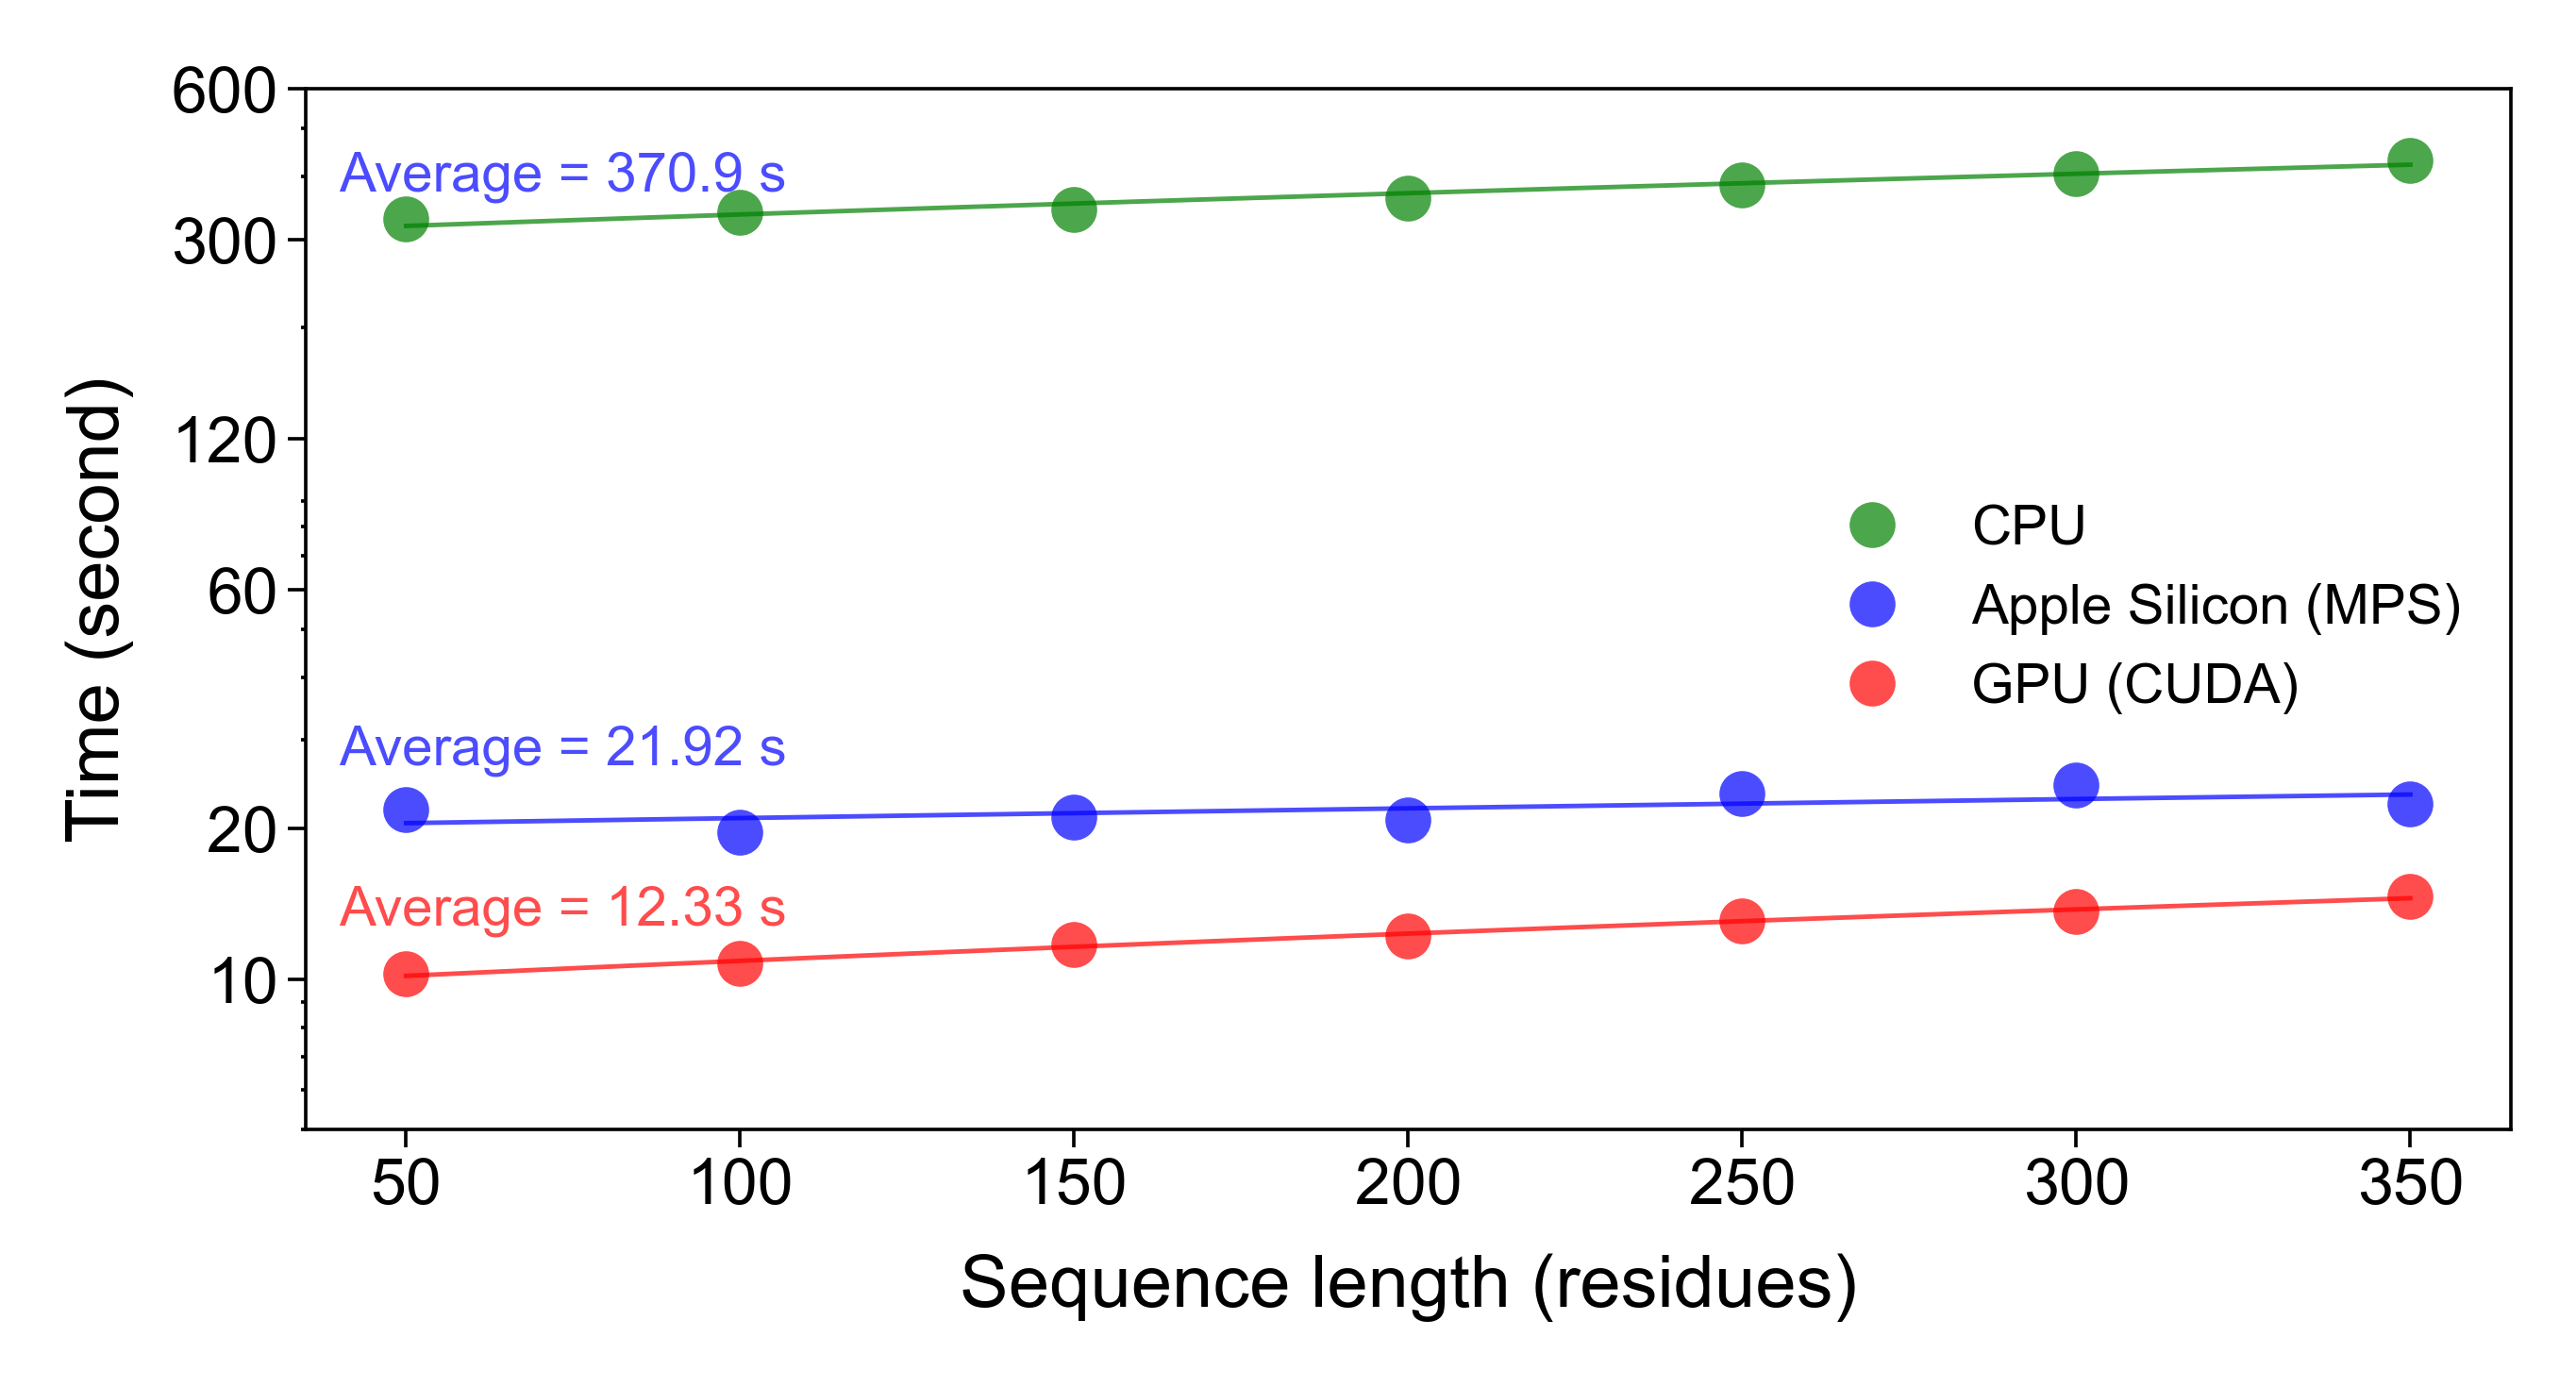

In [23]:
figure(None, (4,2.2), dpi=350)
ax = plt.gca()

USE_LOG = True

#plt.plot(cpu[0],cpu[1], 'og',ms=5, mew=0, alpha=0.7, label='CPU')
#ax.axhline(np.mean(cpu[1]), color='g', alpha=0.7, lw=0.5)
#plt.text(40, np.mean(cpu[1])+60, f"Average = {round(np.mean(cpu[1]),2)} s",color='g', alpha=0.7, fontsize=6)

# CPU data
x = cpu[0]
y = cpu[1]
plt.plot(x,y, 'og',ms=5, mew=0, alpha=0.7, label='CPU')
f = np.polyfit(x,y,1)
xvals = np.arange(50,351,5)
yvals = xvals*f[0] + f[1]
plt.plot(xvals, yvals, color='g',lw=0.5, alpha=0.7)

plt.text(40, np.mean(y)+5, f"Average = {round(np.mean(y),2)} s",color='b', alpha=0.7, fontsize=6)

# MPS data
x = mps[0]
y = mps[1]
plt.plot(x,y, 'ob',ms=5, mew=0, alpha=0.7, label='Apple Silicon (MPS)')
f = np.polyfit(x,y,1)
xvals = np.arange(50,351,5)
yvals = xvals*f[0] + f[1]
plt.plot(xvals, yvals, color='b',lw=0.5, alpha=0.7)

plt.text(40, np.mean(y)+5, f"Average = {round(np.mean(y),2)} s",color='b', alpha=0.7, fontsize=6)

# CUDA data
x = cuda[0]
y = cuda[1]
plt.plot(x,y, 'or',ms=5, mew=0, alpha=0.7, label='GPU (CUDA)')
f = np.polyfit(x,y,1)
xvals = np.arange(50,351,5)
yvals = xvals*f[0] + f[1]
plt.plot(xvals, yvals, color='r',lw=0.5, alpha=0.7)

plt.text(40, np.mean(y)+0.5, f"Average = {round(np.mean(y),2)} s",color='r', alpha=0.7, fontsize=6)
#plt.text(40, np.mean(cuda[1])+2, f"Average = {round(np.mean(cuda[1]),2)} s",color='r', alpha=0.7, fontsize=6)


plt.legend(fontsize=6, frameon=False)

plt.ylim([5,60*10])
plt.yticks(fontsize=7)
if USE_LOG:
    ax.set_yscale('log')
    
ax.set_yticks([10, 20, 60, 120, 300, 600])  # Adjust based on your range
ax.set_yticklabels([str(tick) for tick in ax.get_yticks()], fontsize=7)


plt.xlabel('Sequence length (residues)', fontsize=8)
plt.ylabel('Time (second)', fontsize=8)
plt.xticks(fontsize=7)
plt.tight_layout()
plt.savefig('length_performance.pdf')
plt.savefig('length_performance.png', dpi=450)

